# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
#Type your code here
df = pd.read_csv('Ship_Performance_Dataset.csv')
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
#Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [5]:
df.shape

(2736, 18)

Data berisikan 2736 Baris dan 18 Kolom

Cek data Numerik dan kategori

In [6]:
#Cek Data numerical dan data kategorikal yang mana saja
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

In [7]:
category = df.select_dtypes(include=[object])
category.columns

Index(['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Weather_Condition'],
      dtype='object')

Cek data yang hilang

In [8]:
#Cek missing value
df.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

Karena data yang hilang hanya sedikit dan kita memiliki banyak data jadi kita dapat menghapus 136 baris tersebut

Cek Duplikat

In [9]:
df.duplicated().sum()

np.int64(0)

Tidak ada duplikat

Deskripsikan data dan ketahui datanya dengan desc dan eksplor

In [10]:
df.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


Cek setiap distribusi data Numerikal Tersebut

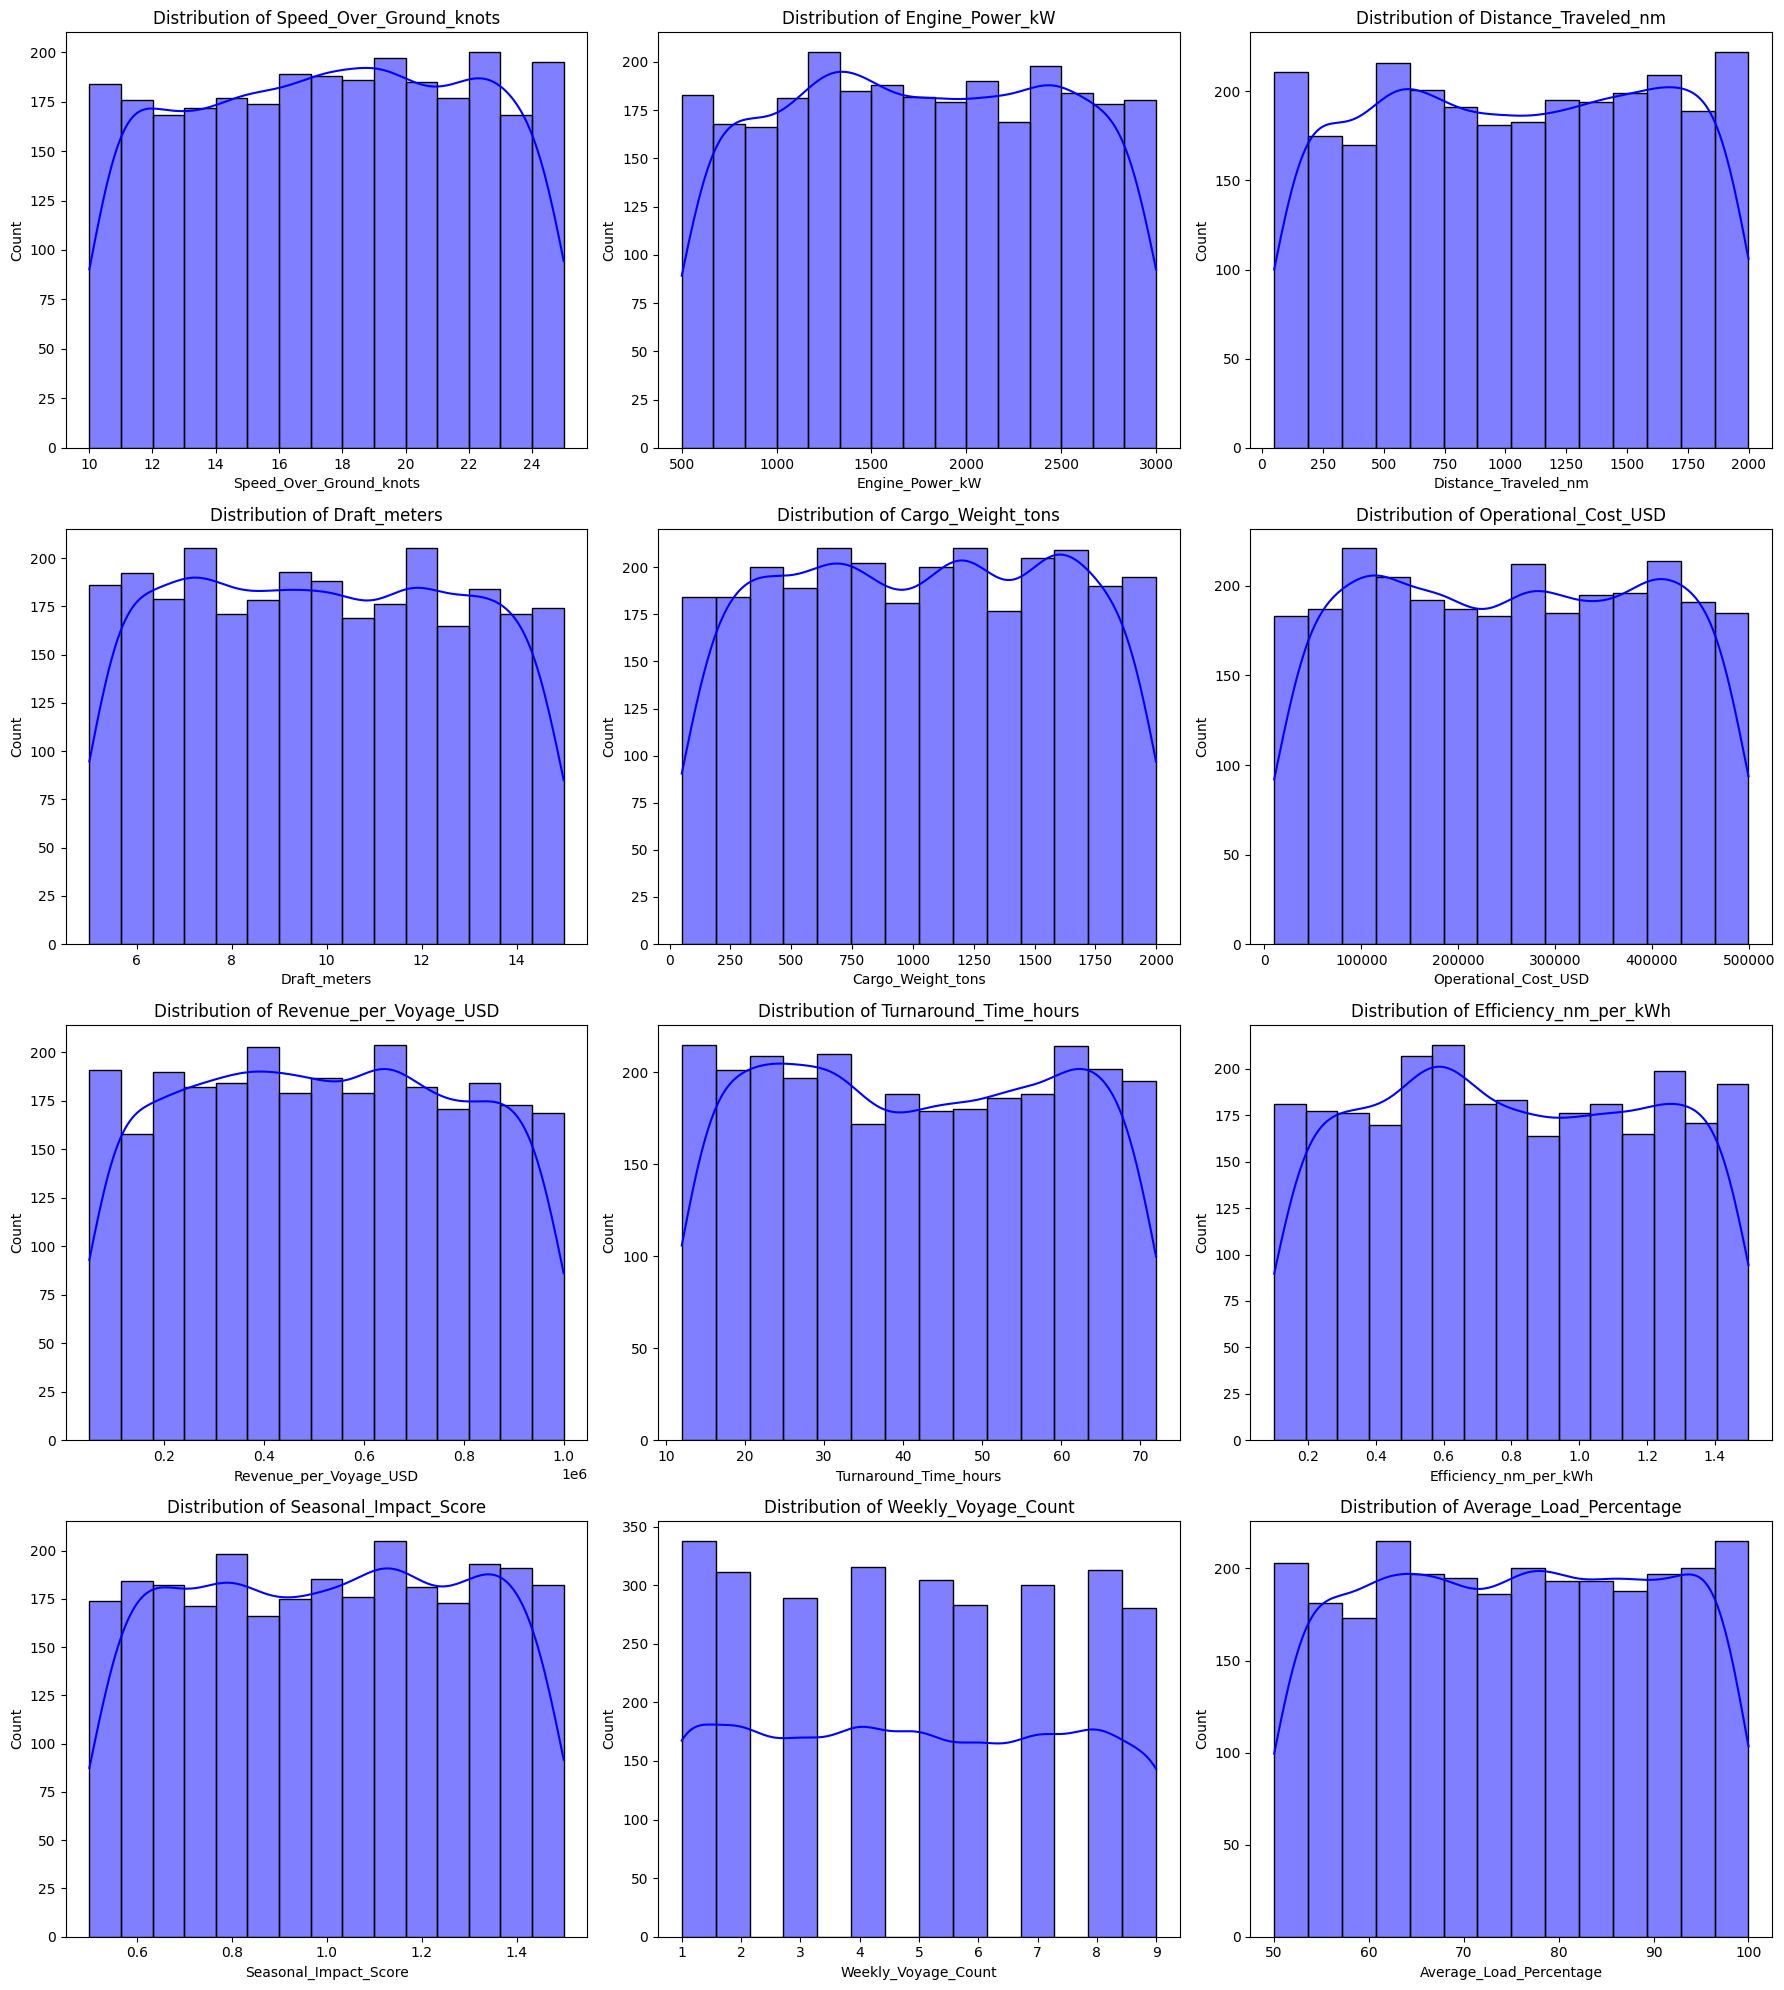

In [11]:


# Plot distributions of key numerical features
num_features = numerical.columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, ax=axes[i],color='blue')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Cek Korelasi antara Kolom Numerik

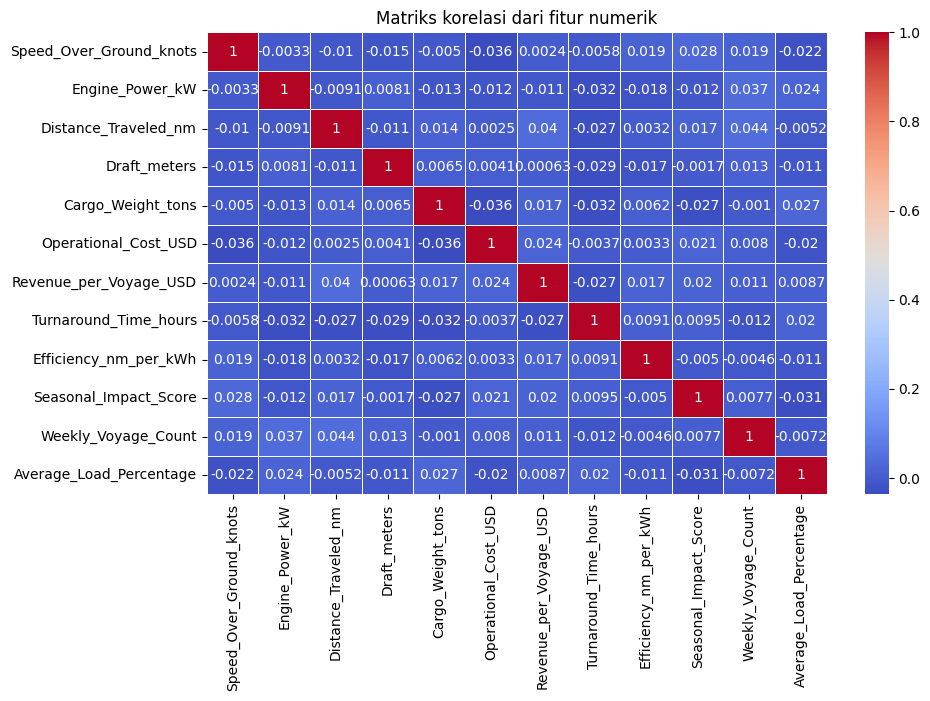

In [12]:
# Compute correlation matrix
corr_matrix = df[num_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks korelasi dari fitur numerik")
plt.show()

Sekarang kita cek kolom kategori nya

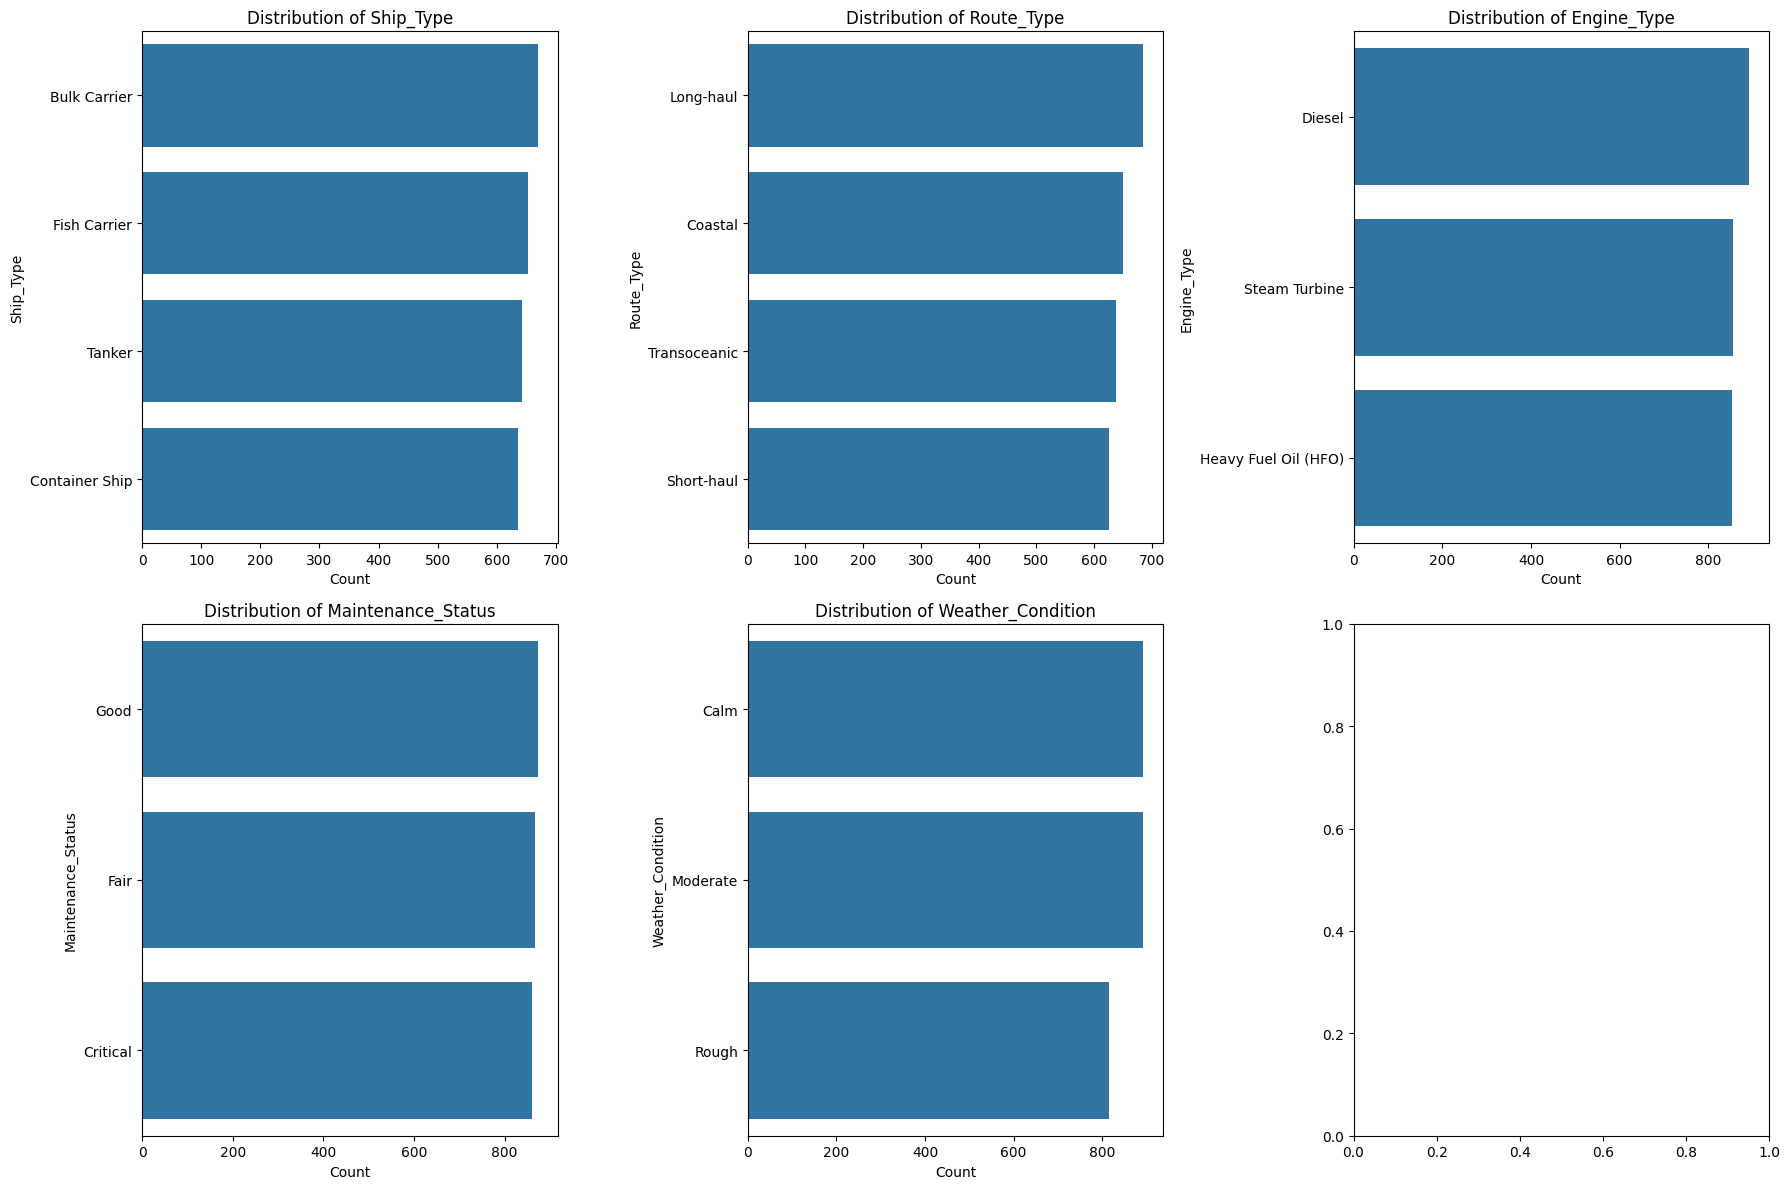

In [13]:
# Categorical columns
cat_features = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']

# Count plots for categorical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    if i < len(cat_features):
        sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel("Count")

plt.tight_layout()
plt.show()


Ada kolom kategori yang berupa ordinal ada yang nominal

Kolom kategori ordinal yaitu Maintenace Status dapat kita gunakan LabelEncoder sedangkan kolom lainnya lebih baik menggunakan One Hot Encoder

Tapi di dalam kasus ini kita akan menggunakan semuanya LabelEncoder

Cek Outlier di setiap Kolom

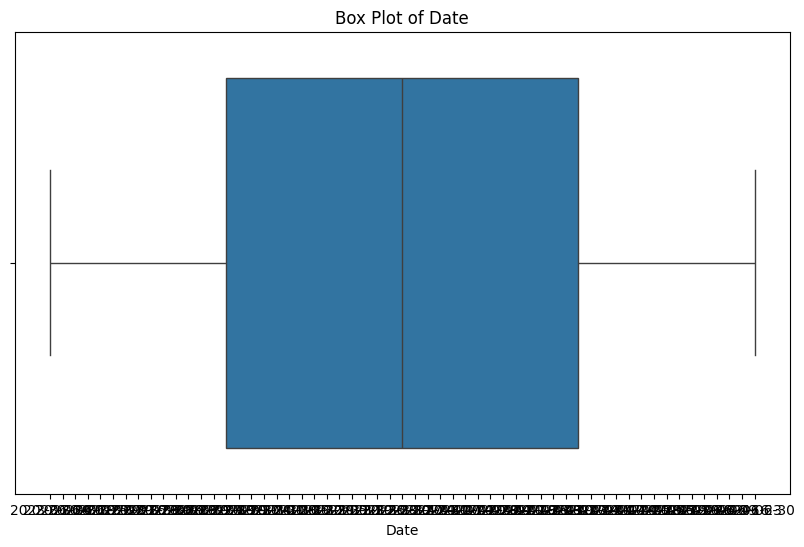

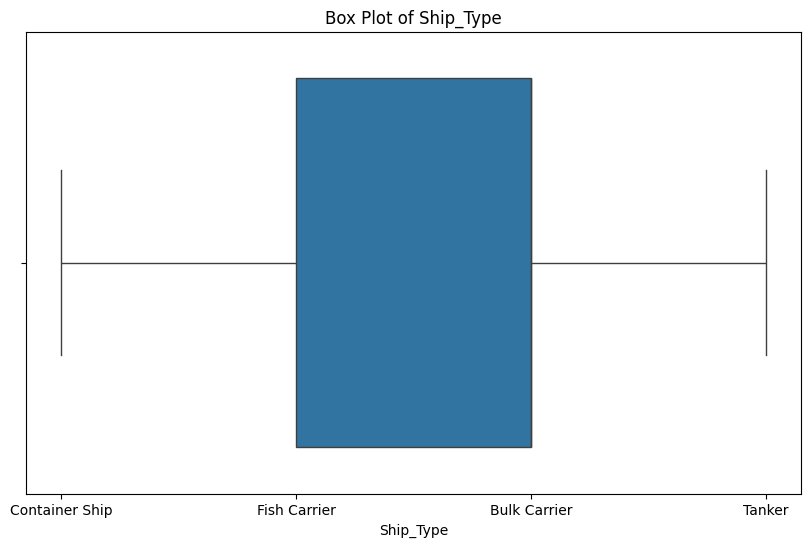

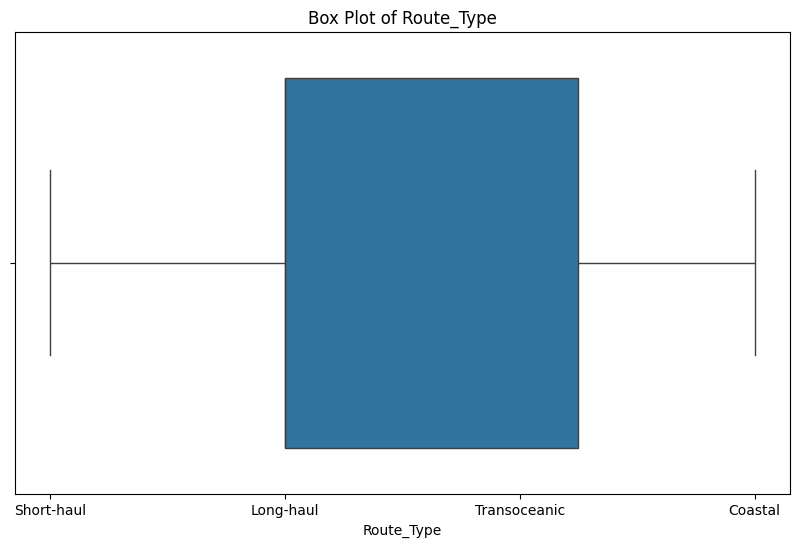

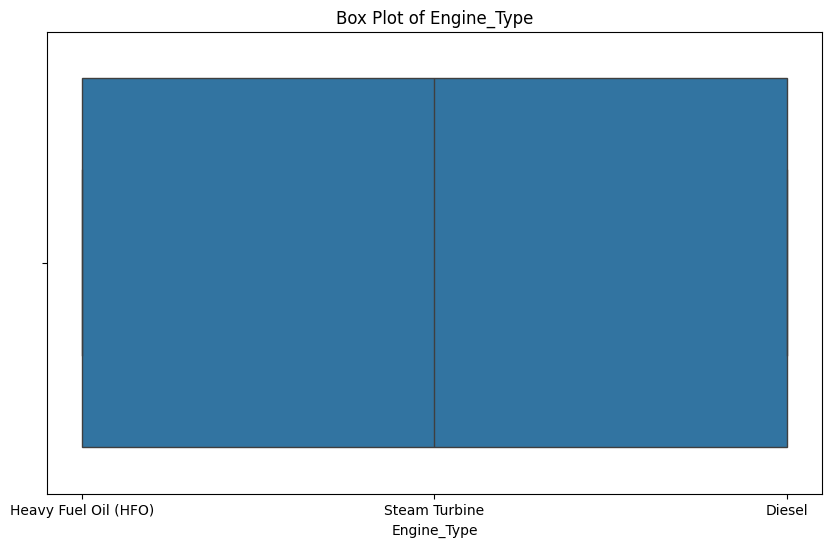

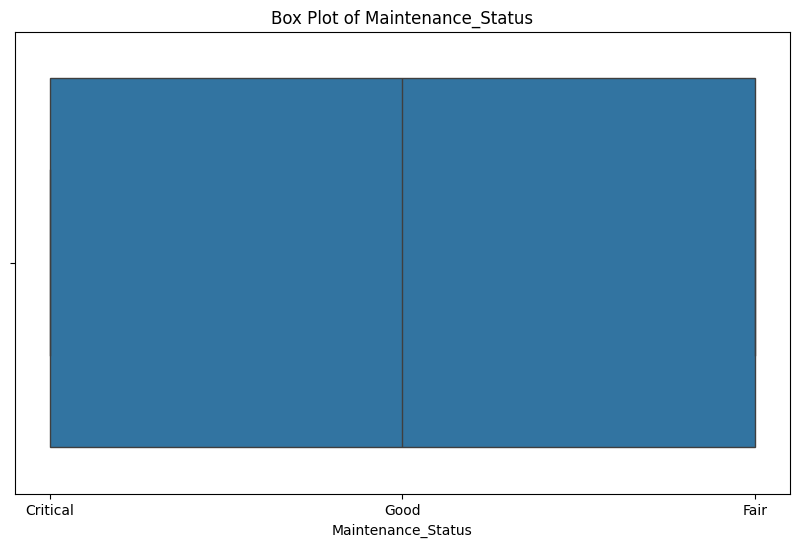

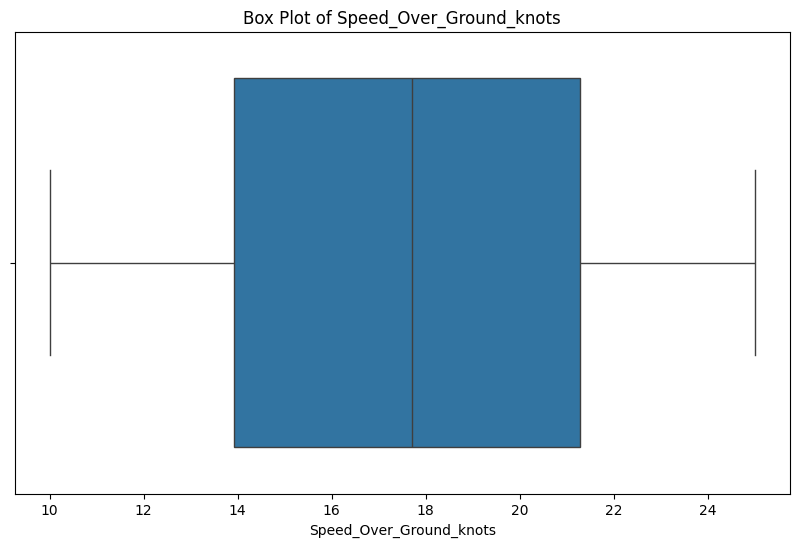

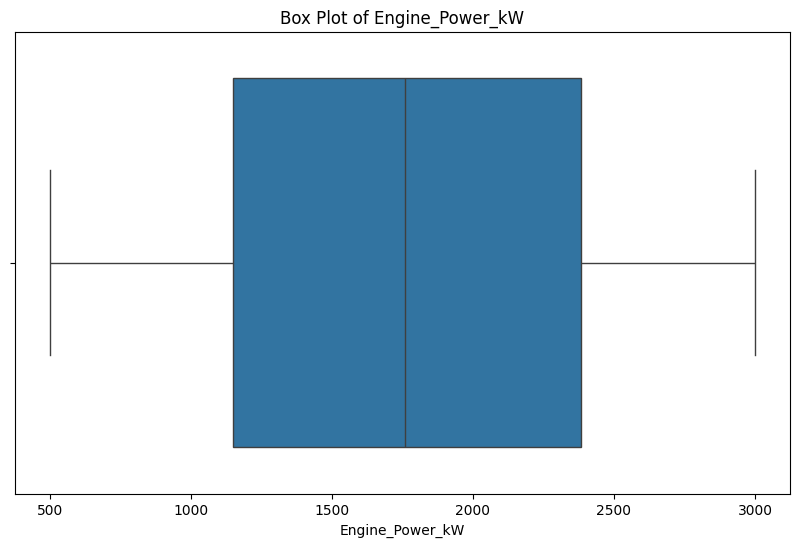

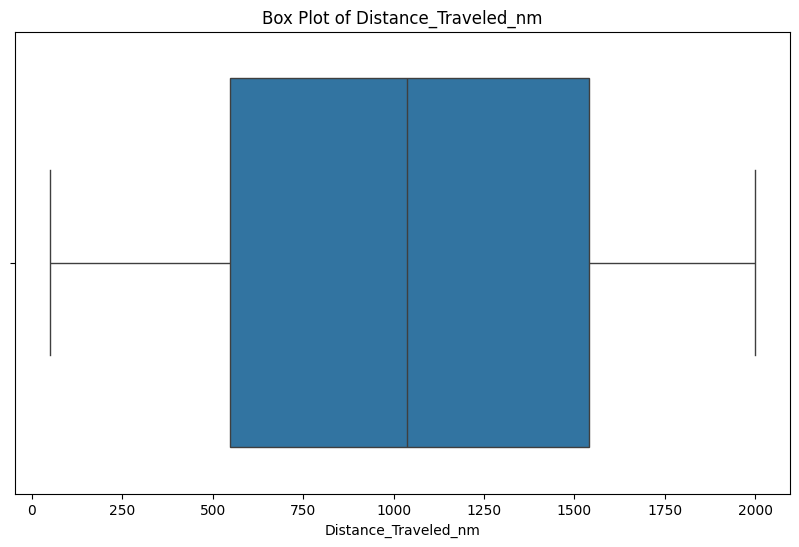

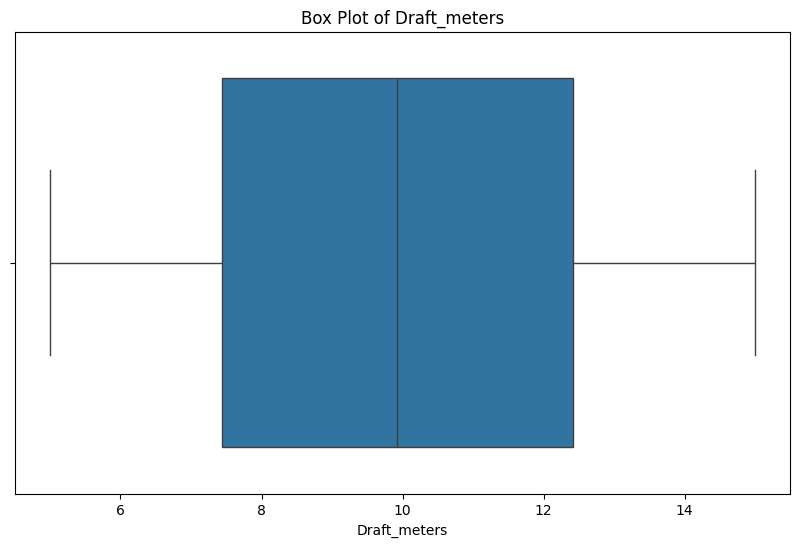

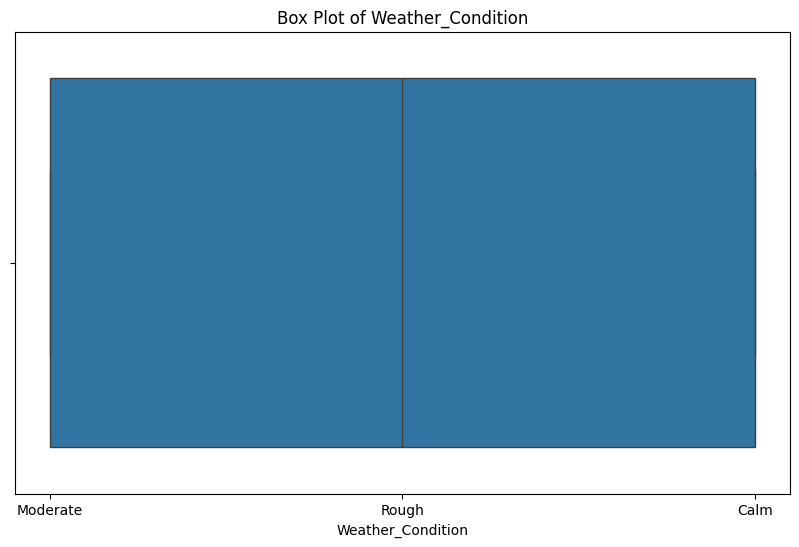

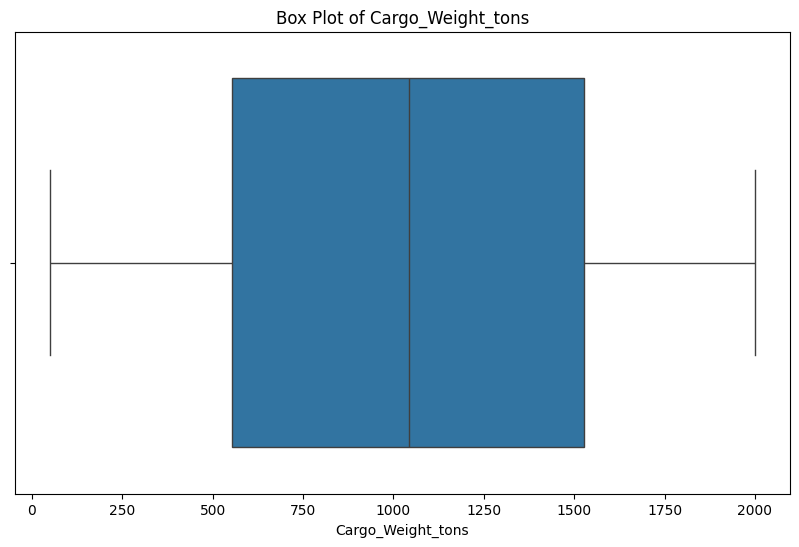

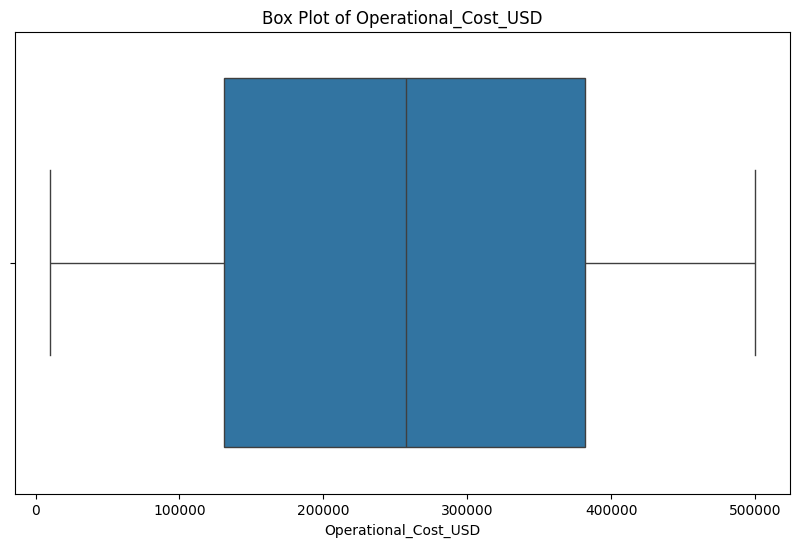

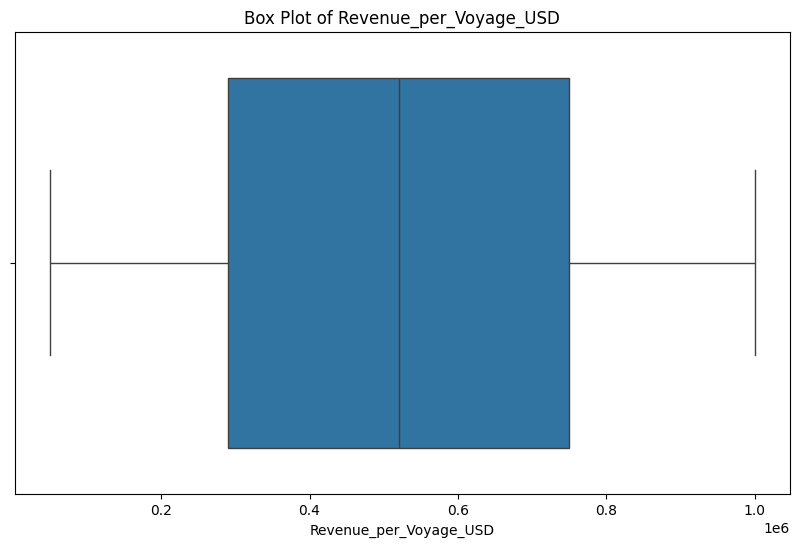

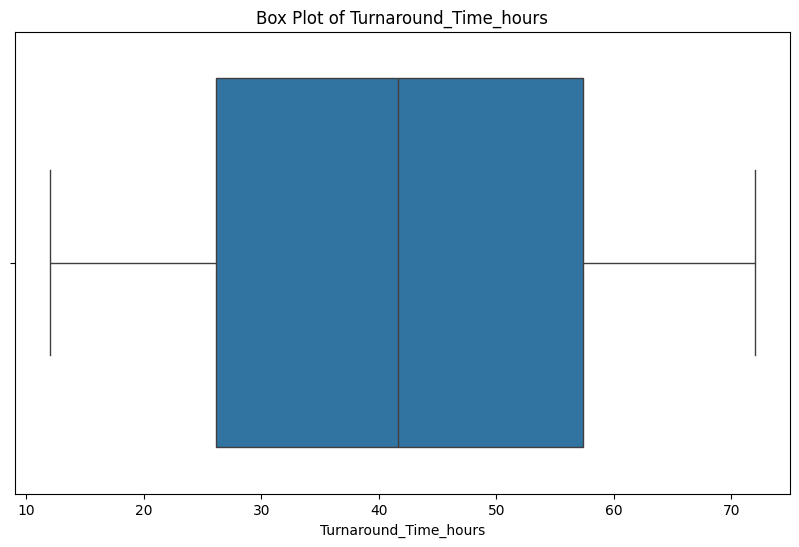

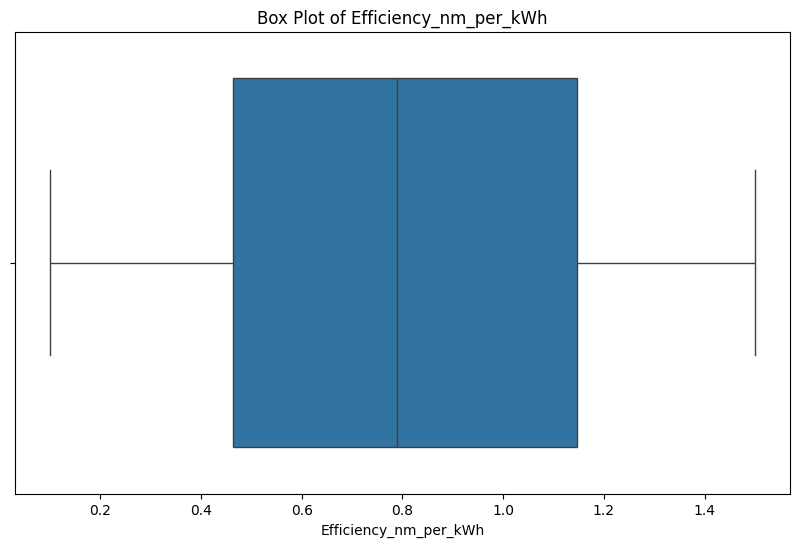

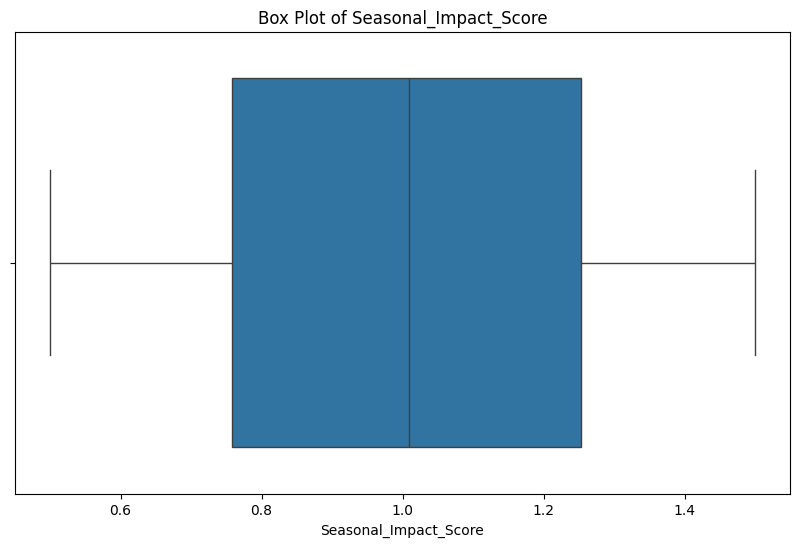

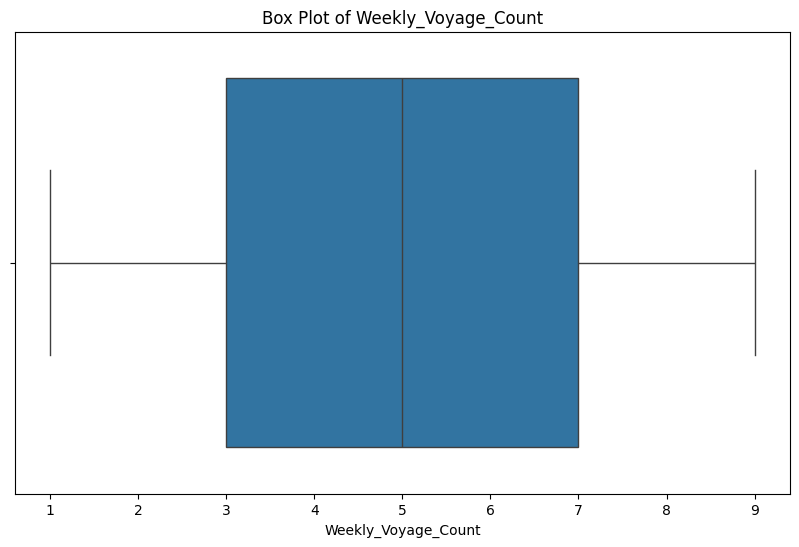

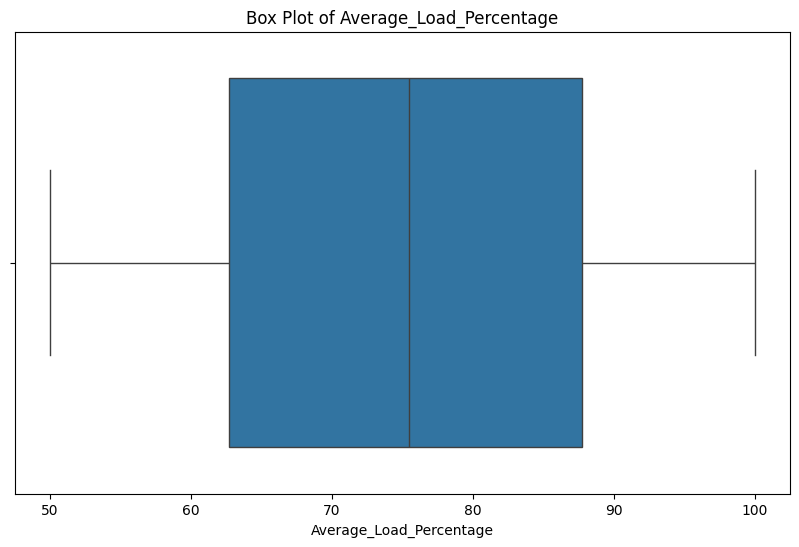

In [14]:
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [15]:
#Hapus kolom Date karena tidak digunakan
df = df.drop(columns=['Date'], axis=1)

In [16]:

print("All column needed", df.columns.tolist())

All column needed ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']


In [17]:
#Ubah data Null menjadi sesuai dengan modus data yang ada karena isinya kategorikal semua yang null
for col in cat_features:
    mode_value = df[col].mode()[0]  # Get the most frequent value
    df[col].fillna(mode_value, inplace=True)

# Verify if any null values remain in categorical columns
df[cat_features].isnull().sum()

C:\Users\acer\AppData\Local\Temp\ipykernel_17656\2110322256.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Ship_Type             0
Route_Type            0
Engine_Type           0
Maintenance_Status    0
Weather_Condition     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2736 non-null   object 
 1   Route_Type               2736 non-null   object 
 2   Engine_Type              2736 non-null   object 
 3   Maintenance_Status       2736 non-null   object 
 4   Speed_Over_Ground_knots  2736 non-null   float64
 5   Engine_Power_kW          2736 non-null   float64
 6   Distance_Traveled_nm     2736 non-null   float64
 7   Draft_meters             2736 non-null   float64
 8   Weather_Condition        2736 non-null   object 
 9   Cargo_Weight_tons        2736 non-null   float64
 10  Operational_Cost_USD     2736 non-null   float64
 11  Revenue_per_Voyage_USD   2736 non-null   float64
 12  Turnaround_Time_hours    2736 non-null   float64
 13  Efficiency_nm_per_kWh    2736 non-null   float64
 14  Seasonal_Impact_Score   

In [19]:
#Kita akan melakukan normalisasi dan encoding pada data kategorikal jadi data tersebut pisahkan terlebih dahulu
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

#Lakukan scaling pada data numerik dan encoding pada data kategorikal
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
df_encoded = pd.DataFrame()
category_mappings = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    category_mappings[col] = le.classes_  # Simpan kategori asli

# 4️⃣ Gabungkan Kembali Data
processed_df = pd.concat([df_scaled, df_encoded], axis=1)
print("Sample dataset setelah Label Encoding dan Standarisasi:")
print(processed_df.info())

Sample dataset setelah Label Encoding dan Standarisasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Speed_Over_Ground_knots  2736 non-null   float64
 1   Engine_Power_kW          2736 non-null   float64
 2   Distance_Traveled_nm     2736 non-null   float64
 3   Draft_meters             2736 non-null   float64
 4   Cargo_Weight_tons        2736 non-null   float64
 5   Operational_Cost_USD     2736 non-null   float64
 6   Revenue_per_Voyage_USD   2736 non-null   float64
 7   Turnaround_Time_hours    2736 non-null   float64
 8   Efficiency_nm_per_kWh    2736 non-null   float64
 9   Seasonal_Impact_Score    2736 non-null   float64
 10  Weekly_Voyage_Count      2736 non-null   float64
 11  Average_Load_Percentage  2736 non-null   float64
 12  Ship_Type                2736 non-null   int64  
 13  Route_Type            

In [20]:
processed_df

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
0,-1.161003,0.425980,-0.009608,1.461520,1.658525,1.623465,-0.845173,-0.900768,1.627007,1.429008,-1.507346,1.278649,1,1,1,0,1
1,-1.673617,0.053631,0.042355,1.642611,-1.557798,1.620311,1.336484,1.219556,-1.259663,-0.410025,0.417824,1.287343,2,2,2,2,2
2,0.729934,-0.152125,-0.664052,-0.949214,-1.529788,1.372949,-0.469621,0.435091,-0.741138,1.394864,1.572926,1.447458,1,1,0,1,1
3,0.800762,-1.175035,0.159036,0.646741,1.261758,0.044058,-1.599821,-1.096910,-0.237289,1.273042,-1.507346,-0.622127,0,3,2,1,1
4,-0.895364,-0.931672,0.719182,-0.069985,-1.381999,0.231250,0.570727,1.271175,1.320115,-1.458833,1.187892,0.330130,2,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,-1.390536,1.619237,-1.400838,1.311522,-1.279032,-0.121878,0.775264,0.306570,0.499631,0.975300,-0.737278,-0.027993,3,2,1,2,1
2732,-0.869845,0.563101,-0.360669,1.628595,-1.457700,-1.661980,-0.542099,1.280686,-0.359792,-0.391160,-1.122312,0.646281,0,2,1,2,0
2733,-0.183047,-0.577513,0.598131,-0.216484,1.070673,-1.251272,-1.059299,0.669519,-0.506763,-0.966044,0.417824,0.396763,1,2,2,0,0
2734,1.282657,0.377379,-0.733772,-1.149293,-1.573825,-1.632075,1.026514,-1.554859,0.240422,-0.349953,-1.122312,1.215535,3,3,1,2,1


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Saya akan menggunakan algoritma Clustering K-Means Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menyiapkan fitur untuk clustering
# X = processed_df[numeric_cols + categorical_cols]

# Menjalankan K-Means dengan jumlah cluster awal (misal k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(processed_df)

# Menambahkan hasil clustering ke dataframe
processed_df["Cluster"] = clusters

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(processed_df, clusters)

# Menampilkan nilai Silhouette Score
silhouette_avg

np.float64(0.07605424041088567)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [22]:
silhouette_avg

np.float64(0.07605424041088567)

Nilai Silhouettee nya 0.07, Ini masih bisa ditingkatkan

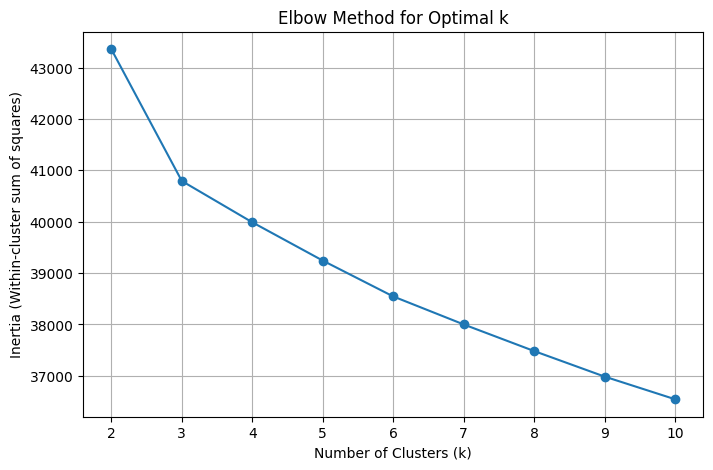

In [23]:
#Type your code here
# Menggunakan Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
K_range = range(2, 11)  # Mencoba k dari 2 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(processed_df)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Kita akan mencoba K 2 dalam pemilihan K tersebut

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [24]:
#Type your code herefrom sklearn.feature_selection import SelectKBest, f_classif

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
# Step 1: Feature Selection using ANOVA (SelectKBest)
y = processed_df["Cluster"]  # Using previous clustering labels as pseudo-target

# Select best 8 features
selector = SelectKBest(score_func=mutual_info_classif, k=6)
X_selected = selector.fit_transform(processed_df.drop(columns=["Cluster"]), y)

# Menampilkan fitur yang dipilih
selected_features = processed_df.drop(columns=["Cluster"]).columns[selector.get_support()]
print("Fitur yang dipilih:", selected_features.tolist())
# Step 2: PCA for Dimensionality Reduction

from sklearn.decomposition import PCA
pca_optimized = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca_selected = pca_optimized.fit_transform(X_selected)



Fitur yang dipilih: ['Cargo_Weight_tons', 'Operational_Cost_USD', 'Seasonal_Impact_Score', 'Ship_Type', 'Route_Type', 'Maintenance_Status']


Dipilih 6 Fitur terbaik yaitu
Fitur yang dipilih: ['Cargo_Weight_tons', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Ship_Type', 'Route_Type', 'Weather_Condition']



Cek kira-kira butuh berapa K yang tinggi

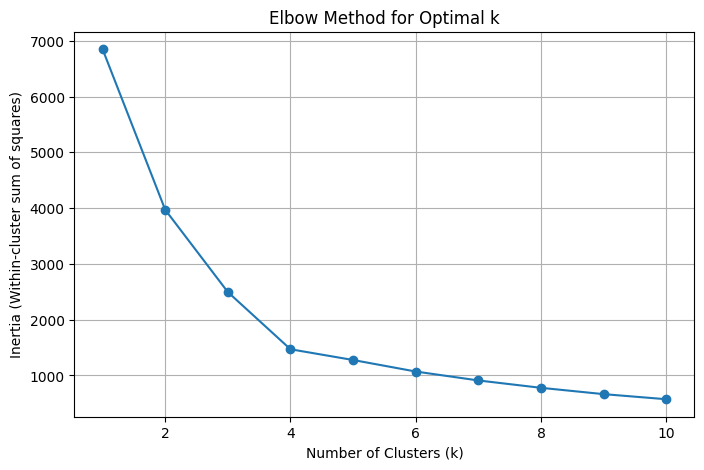

In [25]:
#Type your code here
# Menggunakan Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
K_range = range(1, 11)  # Mencoba k dari 2 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_selected)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [26]:
#Terapkan pada K yang optimal
#Gambar diatas adalah 4
kmeans_optimized = KMeans(n_clusters=4,n_init=10)
clusters_optimized = kmeans_optimized.fit_predict(X_pca_selected)


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

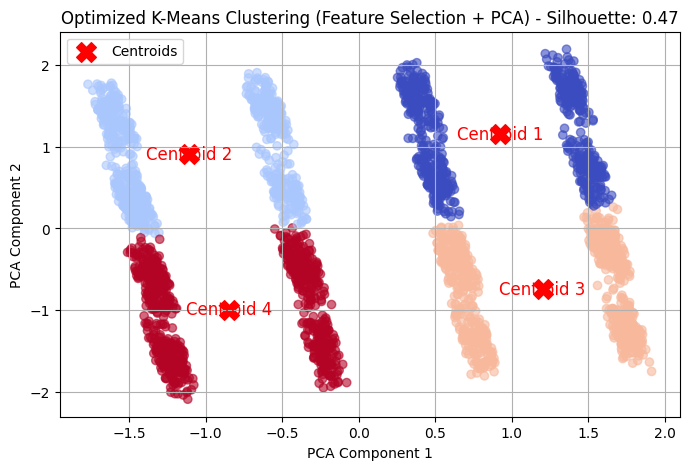

np.float64(0.47440991794557535)

In [27]:
#Type your code here
# Compute silhouette score for optimized clustering
silhouette_optimized = silhouette_score(X_pca_selected, clusters_optimized)

centroids = kmeans_optimized.cluster_centers_

plt.figure(figsize=(8, 5))
plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=clusters_optimized, cmap="coolwarm", alpha=0.6)
plt.scatter(kmeans_optimized.cluster_centers_[:, 0], kmeans_optimized.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Optimized K-Means Clustering (Feature Selection + PCA) - Silhouette: {silhouette_optimized:.2f}")
plt.legend()
plt.grid(True)
plt.show()

# Display silhouette score for optimized model
silhouette_optimized

Nilai SIlhouttee Sekarang adalah 0.4522 sehingga meningkat dari yang sebelumnya

Hasil maksimal yang bisa didapatkan dari cluster data ini adalah
4 cluster
dengan menggunakan kolom 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Seasonal_Impact_Score', 'Ship_Type', 'Route_Type', 'Weather_Condition'
Menghasilkan nilai silhouttee 0.47

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [28]:
# Type your code here
processed_df["Cluster"] = clusters_optimized
processed_df

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cluster
0,-1.161003,0.425980,-0.009608,1.461520,1.658525,1.623465,-0.845173,-0.900768,1.627007,1.429008,-1.507346,1.278649,1,1,1,0,1,3
1,-1.673617,0.053631,0.042355,1.642611,-1.557798,1.620311,1.336484,1.219556,-1.259663,-0.410025,0.417824,1.287343,2,2,2,2,2,0
2,0.729934,-0.152125,-0.664052,-0.949214,-1.529788,1.372949,-0.469621,0.435091,-0.741138,1.394864,1.572926,1.447458,1,1,0,1,1,3
3,0.800762,-1.175035,0.159036,0.646741,1.261758,0.044058,-1.599821,-1.096910,-0.237289,1.273042,-1.507346,-0.622127,0,3,2,1,1,1
4,-0.895364,-0.931672,0.719182,-0.069985,-1.381999,0.231250,0.570727,1.271175,1.320115,-1.458833,1.187892,0.330130,2,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,-1.390536,1.619237,-1.400838,1.311522,-1.279032,-0.121878,0.775264,0.306570,0.499631,0.975300,-0.737278,-0.027993,3,2,1,2,1,0
2732,-0.869845,0.563101,-0.360669,1.628595,-1.457700,-1.661980,-0.542099,1.280686,-0.359792,-0.391160,-1.122312,0.646281,0,2,1,2,0,1
2733,-0.183047,-0.577513,0.598131,-0.216484,1.070673,-1.251272,-1.059299,0.669519,-0.506763,-0.966044,0.417824,0.396763,1,2,2,0,0,1
2734,1.282657,0.377379,-0.733772,-1.149293,-1.573825,-1.632075,1.026514,-1.554859,0.240422,-0.349953,-1.122312,1.215535,3,3,1,2,1,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [29]:
# Inverse transform the scaled features
processed_df[numeric_cols] = scaler.inverse_transform(processed_df[numeric_cols].values)
processed_df.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cluster
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222,1.414474,1.457602,0.936769,1.054459,0.922149,1.603801
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168,1.140895,1.090944,0.827335,0.824862,0.817634,1.116032
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [30]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Speed_Over_Ground_knots  2736 non-null   float64
 1   Engine_Power_kW          2736 non-null   float64
 2   Distance_Traveled_nm     2736 non-null   float64
 3   Draft_meters             2736 non-null   float64
 4   Cargo_Weight_tons        2736 non-null   float64
 5   Operational_Cost_USD     2736 non-null   float64
 6   Revenue_per_Voyage_USD   2736 non-null   float64
 7   Turnaround_Time_hours    2736 non-null   float64
 8   Efficiency_nm_per_kWh    2736 non-null   float64
 9   Seasonal_Impact_Score    2736 non-null   float64
 10  Weekly_Voyage_Count      2736 non-null   float64
 11  Average_Load_Percentage  2736 non-null   float64
 12  Ship_Type                2736 non-null   int64  
 13  Route_Type               2736 non-null   int64  
 14  Engine_Type             

In [31]:
for col in categorical_cols:
    le = LabelEncoder()
    le.classes_ = category_mappings[col]  # Restore original class mapping

    # Check if column is already decoded
    if processed_df[col].dtype == 'object':
        print(f"Skipping {col} as it already contains decoded labels: {processed_df[col].unique()}")
        continue  # Skip if already decoded

    # Apply inverse transform
    processed_df[col] = le.inverse_transform(processed_df[col].astype(int))

In [32]:
processed_df

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cluster
0,12.597558,2062.983982,1030.943616,14.132284,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1.0,93.769249,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,Moderate,3
1,10.387580,1796.057415,1060.486382,14.653083,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,Fish Carrier,Short-haul,Steam Turbine,Good,Rough,0
2,20.749747,1648.556685,658.874144,7.199261,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,Container Ship,Long-haul,Diesel,Fair,Moderate,3
3,21.055102,915.261795,1126.822519,11.789063,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate,1
4,13.742777,1089.721803,1445.281159,9.727833,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,Fish Carrier,Transoceanic,Diesel,Fair,Moderate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,11.607997,2918.395972,239.990359,13.700906,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3.0,74.813114,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,Moderate,0
2732,13.852798,2161.282358,831.355653,14.612775,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2.0,84.595155,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,Calm,1
2733,16.813713,1343.608006,1376.460622,9.306518,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6.0,80.975269,Container Ship,Short-haul,Steam Turbine,Critical,Calm,1
2734,23.132643,2028.143572,619.236340,6.623856,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2.0,92.853622,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,Moderate,0


In [33]:
processed_df.groupby("Cluster")[numeric_cols].mean()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
Cluster,,,,,,,,,,,,
0,17.686782,1781.850601,1015.238499,9.867672,1011.654329,262977.737478,517120.713717,41.567896,0.771481,0.999325,5.071786,75.711072
1,17.716593,1737.219356,1025.147480,9.906361,1044.349545,258955.951682,526749.657426,42.187522,0.831269,0.990106,4.898944,75.215957
2,17.553689,1770.004798,1071.474674,9.930371,1068.536118,246709.027629,518639.367776,40.614424,0.794186,1.011235,4.789096,75.087650
3,17.485238,1745.206232,1030.873723,9.994727,1006.391358,253416.393238,522477.003775,42.527037,0.795786,1.012322,4.920206,74.960858


In [34]:
processed_df.groupby("Cluster")[numeric_cols].max()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
Cluster,,,,,,,,,,,,
0,24.997043,2995.638592,1996.830088,14.992947,1999.126697,499710.905931,999805.847928,71.935442,1.497025,1.497884,9.0,99.832868
1,24.991661,2998.734329,1998.337057,14.991517,1994.949074,499734.867868,995661.655913,71.962125,1.499024,1.498211,9.0,99.990785
2,24.977582,2998.657159,1995.052155,14.989818,1987.606009,499224.561251,999916.696140,71.916127,1.499259,1.498579,9.0,99.999643
3,24.969341,2998.685375,1998.035422,14.989905,1998.248109,498989.085044,997940.646189,71.972415,1.496669,1.499224,9.0,99.947316


In [35]:
processed_df.groupby("Cluster")[numeric_cols].min()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
Cluster,,,,,,,,,,,,
0,10.054319,505.522874,52.566168,5.012141,54.185553,10189.004697,50831.109227,12.069356,0.100583,0.502760,1.0,50.022687
1,10.097208,501.025220,50.433150,5.003111,52.290547,10097.439656,50897.727129,12.172848,0.101872,0.500494,1.0,50.012005
2,10.024793,502.106023,50.524214,5.017875,50.229624,10092.306318,50351.814447,12.058857,0.100211,0.500004,1.0,50.052837
3,10.009756,501.739027,52.365994,5.001947,52.988851,11376.005609,50837.963040,12.019909,0.101466,0.501086,1.0,50.032666


In [36]:
processed_df.groupby("Cluster")[categorical_cols].apply(lambda x: x.mode().iloc[0])

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
Cluster,,,,,
0,Fish Carrier,Short-haul,Diesel,Good,Calm
1,Bulk Carrier,Transoceanic,Diesel,Good,Calm
2,Tanker,Long-haul,Diesel,Good,Calm
3,Bulk Carrier,Long-haul,Diesel,Good,Calm


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
# Type your code here
cluster_col = "Cluster"
agg_funcs = {col: ['mean', 'min', 'max'] for col in numeric_cols}
for col in categorical_cols:
    agg_funcs[col] = lambda x: x.mode().iloc[0] if not x.mode().empty else None

# Hitung agregasi per cluster
cluster_summary = processed_df.groupby(cluster_col).agg(agg_funcs)
# Tampilkan hasil
print(cluster_summary)

        Speed_Over_Ground_knots                       Engine_Power_kW  \
                           mean        min        max            mean   
Cluster                                                                 
0                     17.686782  10.054319  24.997043     1781.850601   
1                     17.716593  10.097208  24.991661     1737.219356   
2                     17.553689  10.024793  24.977582     1770.004798   
3                     17.485238  10.009756  24.969341     1745.206232   

                                 Distance_Traveled_nm                          \
                min          max                 mean        min          max   
Cluster                                                                         
0        505.522874  2995.638592          1015.238499  52.566168  1996.830088   
1        501.025220  2998.734329          1025.147480  50.433150  1998.337057   
2        502.106023  2998.657159          1071.474674  50.524214  1995.052155   
3 

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

Disini saya akan mengambil variabel yang menjadi fitur Cargo_Weight_tons, Operational_Cost_USD
Ship_Type, dan Route_Type
## Cluster 1:
- **Rata-rata Cargo_Weight_tons :** 1015.904276 Dengan **Minimal :** 54.185553	**Maksimal:** 1999.126697
  
- **Rata-rata Operational_Cost_USD:** 260,709.19 Dengan **Minimal :** 10189.004697	**Maksimal:** 499710.905931	

- **Rata-rata Revenue_per_Voyage_USD:** 517,218.05 Dengan **Minimal :** 50831.109227	**Maksimal:** 999805.847928

- Tipe **Kapal Fish Carrier** dan Rute **Transoceanic**

**Analisis**

Klaster ini terdiri dari kapal jenis Fish Carrier yang beroperasi pada rute Transoceanic. Dengan beban kargo yang bervariasi dari sangat kecil hingga mendekati 2000 ton, klaster ini memiliki biaya operasional yang relatif tinggi dibandingkan dengan rata-rata. Kapal dalam klaster ini kemungkinan mengangkut hasil laut yang memiliki fluktuasi berat yang besar, tetapi tetap memberikan pendapatan per perjalanan yang kompetitif.

## Cluster 2:
- **Rata-rata Cargo_Weight_tons**: 1063.78 Dengan **Minimal**: 50.23 **Maksimal**: 1987.61

- **Rata-rata Operational_Cost_USD**: 248,929.03 Dengan **Minimal**: 10,092.31 **Maksimal**: 499,224.56

- **Rata-rata Revenue_per_Voyage_USD**: 518,525.70 Dengan **Minimal**: 50,351.81 **Maksimal**: 999,916.70

- Tipe **Kapal Tanker** dan Rute **Long-haul**

**Analisis**

Klaster ini terdiri dari kapal jenis Tanker yang beroperasi di rute Long-haul. Meskipun rata-rata berat kargo lebih besar dibandingkan Cluster 1, biaya operasionalnya sedikit lebih rendah. Kapal dalam klaster ini kemungkinan mengangkut minyak atau bahan cair lainnya yang memiliki biaya logistik yang lebih terkontrol. Pendapatan per perjalanan tetap tinggi, menunjukkan efisiensi dalam biaya dibandingkan dengan klaster lainnya.

## Cluster 3:
- **Rata-rata Cargo_Weight_tons**: 1001.66 Dengan **Minimal**: 52.99 **Maksimal**: 1998.25

- **Rata-rata Operational_Cost_USD**: 253,869.50 Dengan **Minimal**: 11,376.01 **Maksimal**: 498,989.09

- **Rata-rata Revenue_per_Voyage_USD**: 521,631.71 Dengan **Minimal**: 50,837.96 **Maksimal**: 997,940.65

- Tipe Kapal **Bulk Carrier** dan Rute **Long-haul**

**Analisis**

Klaster ini terdiri dari kapal Bulk Carrier yang beroperasi di rute Long-haul. Beban kargo rata-rata hampir sama dengan klaster lainnya, tetapi sedikit lebih rendah dalam biaya operasional dibandingkan Cluster 1. Pendapatan per perjalanan yang lebih tinggi menunjukkan bahwa kapal dalam klaster ini mungkin lebih menguntungkan, dengan muatan massal yang lebih stabil dan bernilai tinggi.

## Cluster 4:
- **Rata-rata Cargo_Weight_tons**: 1049.96 Dengan **Minimal**: 52.29 **Maksimal**: 1994.95

- **Rata-rata Operational_Cost_USD**: 258,431.82 Dengan **Minimal**: 10,097.44 **Maksimal**: 499,734.87

- **Rata-rata Revenue_per_Voyage_USD**: 527,749.53 Dengan **Minimal**: 50,897.73 **Maksimal**: 995,661.66

- Tipe Kapal **Bulk Carrier** dan Rute **Transoceanic**

**Analisis**

Klaster ini mencerminkan kapal Bulk Carrier yang beroperasi dalam rute Transoceanic. Biaya operasionalnya hampir setara dengan Cluster 1, tetapi pendapatan per perjalanan adalah yang tertinggi di antara semua klaster. Ini menunjukkan bahwa rute Transoceanic untuk kapal Bulk Carrier lebih menguntungkan dibandingkan rute Long-haul, kemungkinan karena jumlah muatan yang lebih besar atau harga yang lebih tinggi untuk barang yang dikirim.

## Kesimpulan

1. Bulk Carrier di rute Transoceanic (Cluster 4) adalah yang paling menguntungkan, dengan pendapatan per perjalanan tertinggi meskipun memiliki biaya operasional yang hampir setara dengan klaster lainnya.

2. Tanker di rute Long-haul (Cluster 2) memiliki biaya operasional terendah, menunjukkan efisiensi biaya yang baik.

3. Fish Carrier (Cluster 1) memiliki beban kargo yang sangat bervariasi, yang mungkin menunjukkan fluktuasi dalam jenis barang yang dikirim.

4. Semua klaster memiliki nilai maksimum yang mendekati 2000 ton untuk beban kargo, menunjukkan kapasitas maksimal kapal yang serupa di semua klaster.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
# Save the processed dataset to CSV
processed_df.to_csv('Ship_Performance_Clustering_Result.csv', index=False)